Aplicando algoritmo de ML no dataset CIC2018

testando o dataset que foi treinado com CIC IDS 2017

In [1]:
!pip install "numpy<2.0" scikit-learn pmdarima statsmodels joblib -U

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import joblib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score
from scipy.stats import sem, t
import seaborn as sns

In [ ]:
data = pd.read_csv('path/all_1132_features_mv_entropia_arima_holder_cic2018.csv', low_memory=False)

In [7]:
colunas_para_dropar = [coluna for coluna in data.columns if 'ARIMA' in coluna]

print("\nColunas encontradas para remover:")
print(colunas_para_dropar)

data = data.drop(columns=colunas_para_dropar)
data.head()


Colunas encontradas para remover:
['Dst Port_ARIMA_fitted_5', 'Dst Port_ARIMA_resid_5', 'Dst Port_ARIMA_forecast_1', 'Dst Port_ARIMA_forecast_2', 'Dst Port_ARIMA_forecast_3', 'Dst Port_ARIMA_forecast_4', 'Dst Port_ARIMA_forecast_5', 'Flow Duration_ARIMA_fitted_5', 'Flow Duration_ARIMA_resid_5', 'Flow Duration_ARIMA_forecast_1', 'Flow Duration_ARIMA_forecast_2', 'Flow Duration_ARIMA_forecast_3', 'Flow Duration_ARIMA_forecast_4', 'Flow Duration_ARIMA_forecast_5', 'Tot Fwd Pkts_ARIMA_fitted_5', 'Tot Fwd Pkts_ARIMA_resid_5', 'Tot Fwd Pkts_ARIMA_forecast_1', 'Tot Fwd Pkts_ARIMA_forecast_2', 'Tot Fwd Pkts_ARIMA_forecast_3', 'Tot Fwd Pkts_ARIMA_forecast_4', 'Tot Fwd Pkts_ARIMA_forecast_5', 'Tot Bwd Pkts_ARIMA_fitted_5', 'Tot Bwd Pkts_ARIMA_resid_5', 'Tot Bwd Pkts_ARIMA_forecast_1', 'Tot Bwd Pkts_ARIMA_forecast_2', 'Tot Bwd Pkts_ARIMA_forecast_3', 'Tot Bwd Pkts_ARIMA_forecast_4', 'Tot Bwd Pkts_ARIMA_forecast_5', 'TotLen Fwd Pkts_ARIMA_fitted_5', 'TotLen Fwd Pkts_ARIMA_resid_5', 'TotLen Fwd Pk

,Unnamed: 0,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,ECE Flag Cnt_entropy_j40,ECE Flag Cnt_j50,ECE Flag Cnt_j50_mean,ECE Flag Cnt_entropy_j50,Bwd IAT Mean_holder_j5,Bwd IAT Min_holder_j5,Fwd Seg Size Min_holder_j5,Active Mean_holder_j5,Active Min_holder_j5,Label
0,0,36244.0,4434498.0,5.0,4.0,935.0,732.0,935.0,0.0,187.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,1,59916.0,4367395.0,5.0,4.0,935.0,596.0,935.0,0.0,187.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,2,443.0,118097840.0,18.0,18.0,865.0,12894.0,232.0,0.0,48.055556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,3,59752.0,4555174.0,5.0,3.0,935.0,321.0,935.0,0.0,187.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,4,37878.0,43546.0,1.0,3.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [8]:
colunas_para_dropar = [coluna for coluna in data.columns if 'holder' in coluna]

print("\nColunas encontradas para remover:")
print(colunas_para_dropar)

data = data.drop(columns=colunas_para_dropar)
data.head()


Colunas encontradas para remover:
['Bwd IAT Mean_holder_j5', 'Bwd IAT Min_holder_j5', 'Fwd Seg Size Min_holder_j5', 'Active Mean_holder_j5', 'Active Min_holder_j5']


,Unnamed: 0,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,ECE Flag Cnt_j30,ECE Flag Cnt_j30_mean,ECE Flag Cnt_entropy_j30,ECE Flag Cnt_j40,ECE Flag Cnt_j40_mean,ECE Flag Cnt_entropy_j40,ECE Flag Cnt_j50,ECE Flag Cnt_j50_mean,ECE Flag Cnt_entropy_j50,Label
0,0,36244.0,4434498.0,5.0,4.0,935.0,732.0,935.0,0.0,187.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,1,59916.0,4367395.0,5.0,4.0,935.0,596.0,935.0,0.0,187.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,2,443.0,118097840.0,18.0,18.0,865.0,12894.0,232.0,0.0,48.055556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,3,59752.0,4555174.0,5.0,3.0,935.0,321.0,935.0,0.0,187.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,4,37878.0,43546.0,1.0,3.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [ ]:
features = pd.read_csv('/poseiddon/GROUP B/CONFIGURATION 5/ST_new_features.csv', low_memory=False)

In [10]:
features = features.columns
print(features)

Index(['Fwd Seg Size Min', 'Active Mean', 'Active Min', 'Dst Port_SMA_6',
       'Dst Port_EMA_6', 'Dst Port_SMA_9', 'Dst Port_EMA_9', 'Dst Port_SMA_12',
       'Dst Port_EMA_12', 'Bwd Pkt Len Max_SMA_3',
       ...
       'PSH Flag Cnt_entropy_j20', 'PSH Flag Cnt_entropy_j30',
       'PSH Flag Cnt_entropy_j40', 'PSH Flag Cnt_entropy_j50',
       'ACK Flag Cnt_entropy_j10', 'ACK Flag Cnt_entropy_j20',
       'ACK Flag Cnt_entropy_j30', 'ACK Flag Cnt_entropy_j40',
       'ACK Flag Cnt_entropy_j50', 'Label'],
      dtype='object', length=101)


In [11]:
data = data[features]
data.head()

,Fwd Seg Size Min,Active Mean,Active Min,Dst Port_SMA_6,Dst Port_EMA_6,Dst Port_SMA_9,Dst Port_EMA_9,Dst Port_SMA_12,Dst Port_EMA_12,Bwd Pkt Len Max_SMA_3,...,PSH Flag Cnt_entropy_j20,PSH Flag Cnt_entropy_j30,PSH Flag Cnt_entropy_j40,PSH Flag Cnt_entropy_j50,ACK Flag Cnt_entropy_j10,ACK Flag Cnt_entropy_j20,ACK Flag Cnt_entropy_j30,ACK Flag Cnt_entropy_j40,ACK Flag Cnt_entropy_j50,Label
0,32.0,0.0,0.0,36244.00,36244.000000,36244.00,36244.0000,36244.00,36244.000000,366.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,32.0,0.0,0.0,48080.00,43007.428571,48080.00,40978.4000,48080.00,39885.846154,332.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,20.0,270018.0,77763.0,32201.00,30846.163265,32201.00,32871.3200,32201.00,33817.715976,708.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,32.0,0.0,0.0,39088.75,39104.973761,39088.75,38247.4560,39088.75,37807.605826,693.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,32.0,0.0,0.0,38846.60,38754.409829,38846.60,38173.5648,38846.60,37818.435699,593.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [ ]:
data['Label'] = data['Label'].replace(['Benign'], 0)
data['Label'] = data['Label'].replace(['DoS attacks-SlowHTTPTest'], 1)
data['Label'] = data['Label'].replace(['DoS attacks-Slowloris'], 2)
data['Label'].value_counts()

/tmp/ipython-input-2955789806.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Label'] = data['Label'].replace(['DoS attacks-Slowloris'], 2)


,count
Label,
0,139890
1,139890
2,10990


Text(0.5, 1.02, 'Contagem de Amostras por Classe')

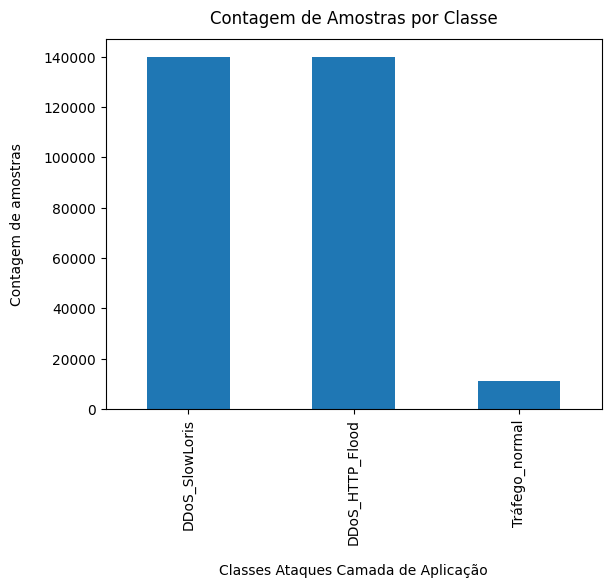

In [ ]:
names = ['Tráfego_normal', 'DDoS_HTTP_Flood','DDoS_SlowLoris']
classes_show = [names[i - 1] for i in data['Label'].unique()]
index = np.arange(len(classes_show))


df_visualization = data.copy()
df_visualization['Label'] = df_visualization['Label'].apply(lambda x:classes_show[x] )

df_visualization['Label'].value_counts().plot.bar(x = 'count', y = 'Label' )

plt.xlabel("Classes Ataques Camada de Aplicação", labelpad=14)
plt.ylabel("Contagem de amostras", labelpad=14)
plt.title("Contagem de Amostras por Classe", y=1.02)

In [ ]:
y = data['Label']
x = data.drop(['Label'],axis=1)
x.head()

,Fwd Seg Size Min,Active Mean,Active Min,Dst Port_SMA_6,Dst Port_EMA_6,Dst Port_SMA_9,Dst Port_EMA_9,Dst Port_SMA_12,Dst Port_EMA_12,Bwd Pkt Len Max_SMA_3,...,PSH Flag Cnt_entropy_j10,PSH Flag Cnt_entropy_j20,PSH Flag Cnt_entropy_j30,PSH Flag Cnt_entropy_j40,PSH Flag Cnt_entropy_j50,ACK Flag Cnt_entropy_j10,ACK Flag Cnt_entropy_j20,ACK Flag Cnt_entropy_j30,ACK Flag Cnt_entropy_j40,ACK Flag Cnt_entropy_j50
0,32.0,0.0,0.0,36244.00,36244.000000,36244.00,36244.0000,36244.00,36244.000000,366.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,32.0,0.0,0.0,48080.00,43007.428571,48080.00,40978.4000,48080.00,39885.846154,332.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20.0,270018.0,77763.0,32201.00,30846.163265,32201.00,32871.3200,32201.00,33817.715976,708.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,32.0,0.0,0.0,39088.75,39104.973761,39088.75,38247.4560,39088.75,37807.605826,693.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32.0,0.0,0.0,38846.60,38754.409829,38846.60,38173.5648,38846.60,37818.435699,593.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
dt_null = x.isnull().sum()
dt_null

,0
Fwd Seg Size Min,0
Active Mean,0
Active Min,0
Dst Port_SMA_6,0
Dst Port_EMA_6,0
...,...
ACK Flag Cnt_entropy_j10,0
ACK Flag Cnt_entropy_j20,0
ACK Flag Cnt_entropy_j30,0
ACK Flag Cnt_entropy_j40,0


In [ ]:
x = x.replace([np.inf, -np.inf], np.nan)

x = x.fillna(0)

In [18]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [19]:
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model # É o mesmo que tf.keras.models.load_model
import os

In [ ]:
mlp_path = '/poseiddon/GROUP B/CONFIGURATION 5/CICIDS2017_mlp.joblib'
svm_path = '/poseiddon/GROUP B/CONFIGURATION 5/CICIDS2017_svm.joblib'
nb_path = '/poseiddon/GROUP B/CONFIGURATION 5/CICIDS2017_nb.joblib'
dt_path = '/poseiddon/GROUP B/CONFIGURATION 5/CICIDS2017_dt.joblib'
rf_path = '/poseiddon/GROUP B/CONFIGURATION 5/CICIDS2017_rf.joblib'
adb_path = '/poseiddon/GROUP B/CONFIGURATION 5/CICIDS2017_adb.joblib'
modelLSTM = '/poseiddon/GROUP B/CONFIGURATION 5/CICIDS2017_lstm.h5'
model_gru = '/poseiddon/GROUP B/CONFIGURATION 5/CICIDS2017_gru.h5'

mlp = joblib.load(mlp_path)
svm = joblib.load(svm_path)
nb = joblib.load(nb_path)
dt = joblib.load(dt_path)
rf = joblib.load(rf_path)
adb = joblib.load(adb_path)
try:
    lstm = load_model(modelLSTM)
    print("Modelo LSTM carregado com sucesso do arquivo .h5!")
    lstm.summary()
except Exception as e:
    print(f"Erro ao carregar o modelo .h5: {e}")

try:
    gru = load_model(model_gru)
    print("Modelo LSTM carregado com sucesso do arquivo .h5!")
    gru.summary()
except Exception as e:
    print(f"Erro ao carregar o modelo .h5: {e}")

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator GaussianNB from version 1.7.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Modelo LSTM carregado com sucesso do arquivo .h5!


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 100, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_12 (Conv1D)              │ (None, 100, 256)       │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 100, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_12 (ReLU)                 │ (None, 100, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 100, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_13 (Conv1D)              │ (None, 100, 256)       │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 100, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_13 (ReLU)                 │ (None, 100, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 100, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_14 (Conv1D)              │ (None, 100, 64)        │        49,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 100, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_14 (ReLU)                 │ (None, 100, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_4      │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 249,605 (975.02 KB)

 Trainable params: 248,451 (970.51 KB)

 Non-trainable params: 1,152 (4.50 KB)

 Optimizer params: 2 (12.00 B)

Modelo LSTM carregado com sucesso do arquivo .h5!


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_13 (GRU)                    │ (None, 128)            │        50,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_55 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_56 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,757 (229.52 KB)

 Trainable params: 58,755 (229.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [21]:
modelMLP = mlp
svm = svm
nb = nb
modelDT = dt
modelRF = rf
adb = adb

In [22]:
predictsMLP = mlp.predict(x)
predictsSVM = svm.predict(x)
predictsNB = nb.predict(x)
predictsDT = dt.predict(x)
predictsRF = rf.predict(x)
predictsADB = adb.predict(x)
predictLSTM = lstm.predict(x)
predictGRU = gru.predict(x)

9087/9087 ━━━━━━━━━━━━━━━━━━━━ 112s 12ms/step
9087/9087 ━━━━━━━━━━━━━━━━━━━━ 195s 21ms/step


In [23]:
accuracyMLP = accuracy_score(y, predictsMLP)
print(f'Precisão do modelo de MLP: {accuracyMLP}')

reportMLP = classification_report(y, predictsMLP, digits=4)
print(f'\nRelatório de Classificação:\n{reportMLP}')

Precisão do modelo de MLP: 0.9976648209925371

Relatório de Classificação:
              precision    recall  f1-score   support

           0     1.0000    0.9971    0.9985    139890
           1     0.9979    0.9999    0.9989    139890
           2     0.9658    0.9759    0.9708     10990

    accuracy                         0.9977    290770
   macro avg     0.9879    0.9910    0.9894    290770
weighted avg     0.9977    0.9977    0.9977    290770



In [24]:
y_test = y
x_test = x

In [25]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

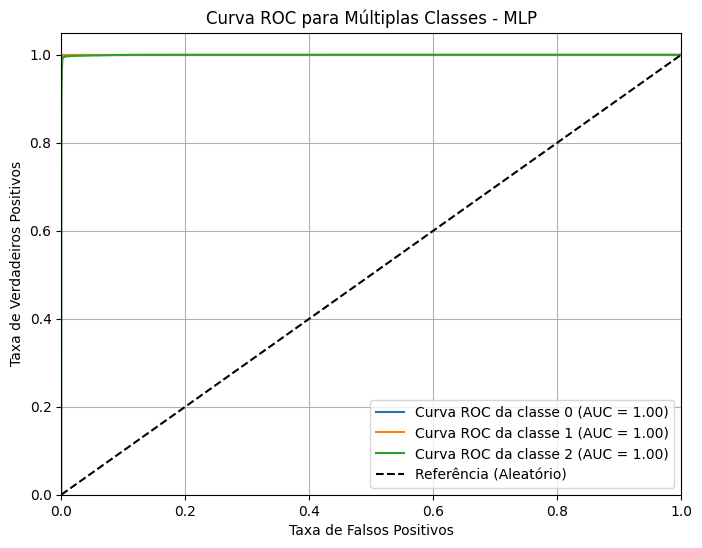

In [ ]:
class_names_mlp = mlp.classes_
y_test_bin = label_binarize(y, classes=class_names_mlp)
n_classes = y_test_bin.shape[1]
y_pred_prob = mlp.predict_proba(x)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names_mlp[i]} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - MLP')
plt.legend(loc="lower right")
plt.grid()
plt.show()

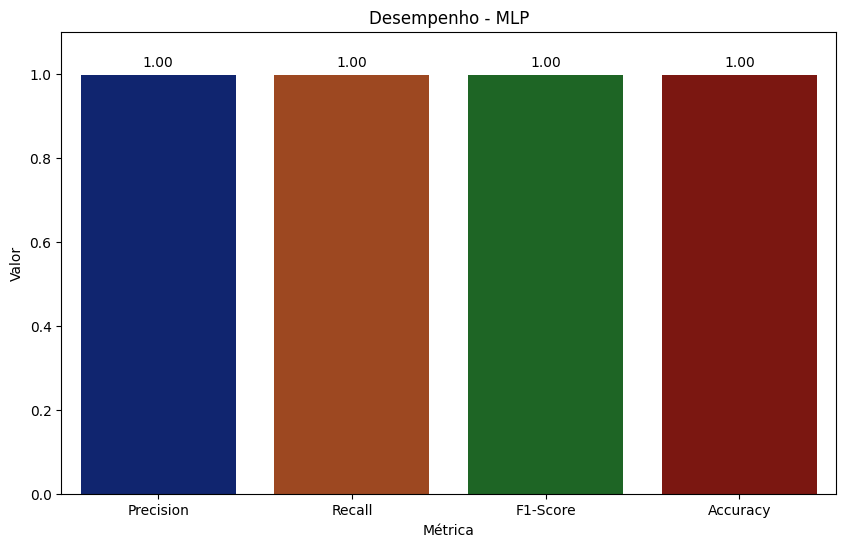

In [ ]:
y_pred = predictsMLP
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
accuracy = accuracy_score(y, y_pred)

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  
                textcoords = 'offset points')

plt.title('Desempenho - MLP')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

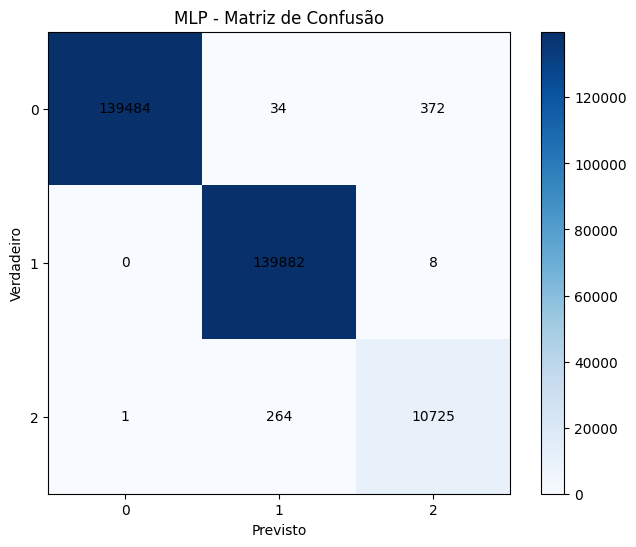

In [ ]:
conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(len(class_names_mlp)):
    for j in range(len(class_names_mlp)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('MLP - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.xticks(ticks=np.arange(len(class_names_mlp)), labels=class_names_mlp)
plt.yticks(ticks=np.arange(len(class_names_mlp)), labels=class_names_mlp)
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

print(classification_report(y, predictsADB))


accuracyadb = accuracy_score(y, predictsADB)
print(f'Precisão do modelo de AdaBoost: {accuracyadb}')

reportadb = classification_report(y, predictsADB, digits=4)
print(f'\nRelatório de Classificação:\n{reportadb}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    139890
           1       1.00      1.00      1.00    139890
           2       0.99      1.00      0.99     10990

    accuracy                           1.00    290770
   macro avg       1.00      1.00      1.00    290770
weighted avg       1.00      1.00      1.00    290770

Precisão do modelo de AdaBoost: 0.9995047632149121

Relatório de Classificação:
              precision    recall  f1-score   support

           0     1.0000    0.9994    0.9997    139890
           1     0.9999    0.9996    0.9998    139890
           2     0.9890    0.9992    0.9941     10990

    accuracy                         0.9995    290770
   macro avg     0.9963    0.9994    0.9978    290770
weighted avg     0.9995    0.9995    0.9995    290770



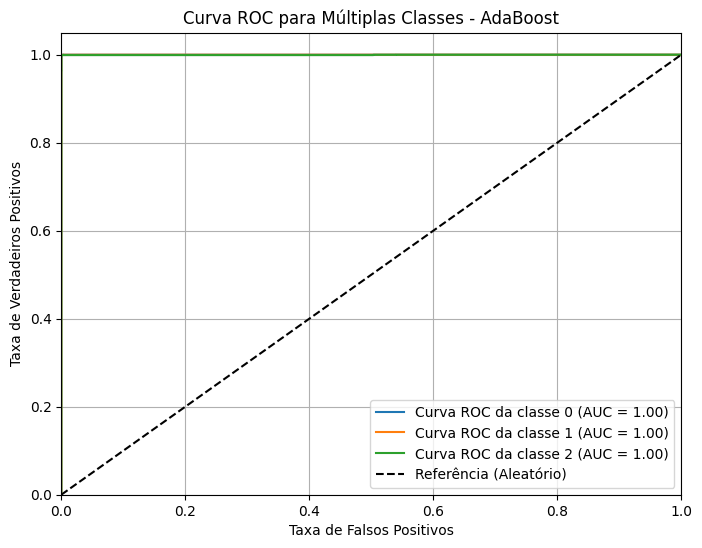

In [ ]:
class_names_adb = adb.classes_
y_test_bin = label_binarize(y, classes=class_names_adb)
n_classes = y_test_bin.shape[1]
y_pred_prob = adb.predict_proba(x)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names_adb[i]} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - AdaBoost')
plt.legend(loc="lower right")
plt.grid()
plt.show()

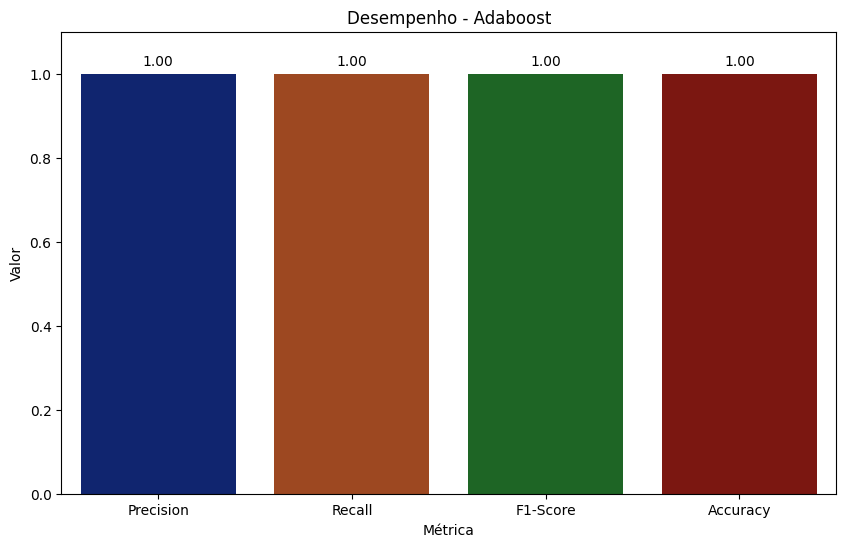

In [ ]:
y_pred = predictsADB
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
accuracy = accuracy_score(y, y_pred)

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  
                textcoords = 'offset points')

plt.title('Desempenho - Adaboost')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

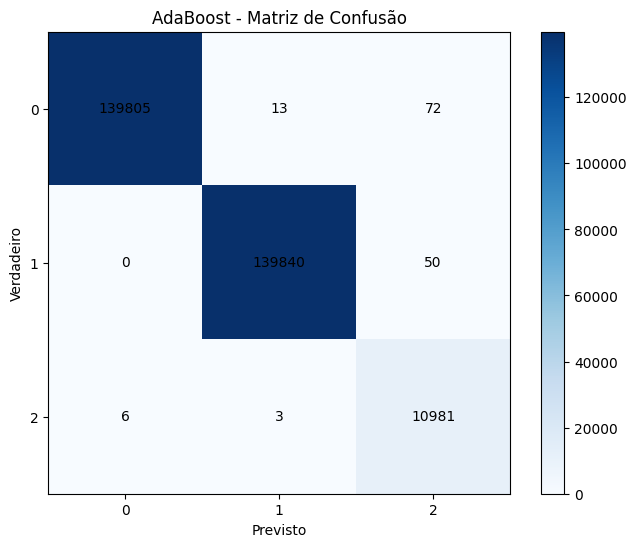

In [ ]:
conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(len(class_names_adb)):
    for j in range(len(class_names_adb)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('AdaBoost - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.xticks(ticks=np.arange(len(class_names_adb)), labels=class_names_adb)
plt.yticks(ticks=np.arange(len(class_names_adb)), labels=class_names_adb)
plt.show()

In [33]:
accuracySVM = accuracy_score(y, predictsSVM)
print(f'Precisão do modelo de SVM: {accuracySVM}')

reportSVM = classification_report(y, predictsSVM, digits=4)
print(f'\nRelatório de Classificação:\n{reportSVM}')

Precisão do modelo de SVM: 0.9635691439969736

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9297    1.0000    0.9635    139890
           1     1.0000    0.9999    1.0000    139890
           2     0.9854    0.0369    0.0710     10990

    accuracy                         0.9636    290770
   macro avg     0.9717    0.6789    0.6782    290770
weighted avg     0.9656    0.9636    0.9473    290770



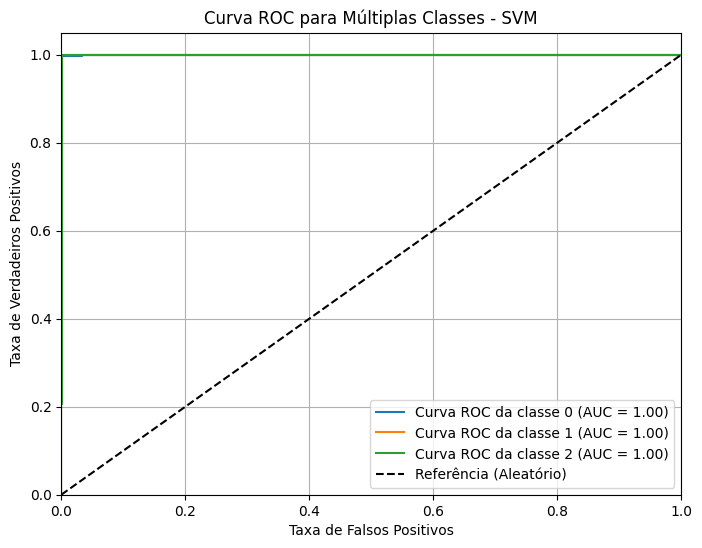

In [ ]:
class_names_svm = svm.classes_
y_test_bin = label_binarize(y, classes=class_names_svm)
n_classes = y_test_bin.shape[1]
y_pred_prob = svm.predict_proba(x)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names_svm[i]} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - SVM')
plt.legend(loc="lower right")
plt.grid()
plt.show()

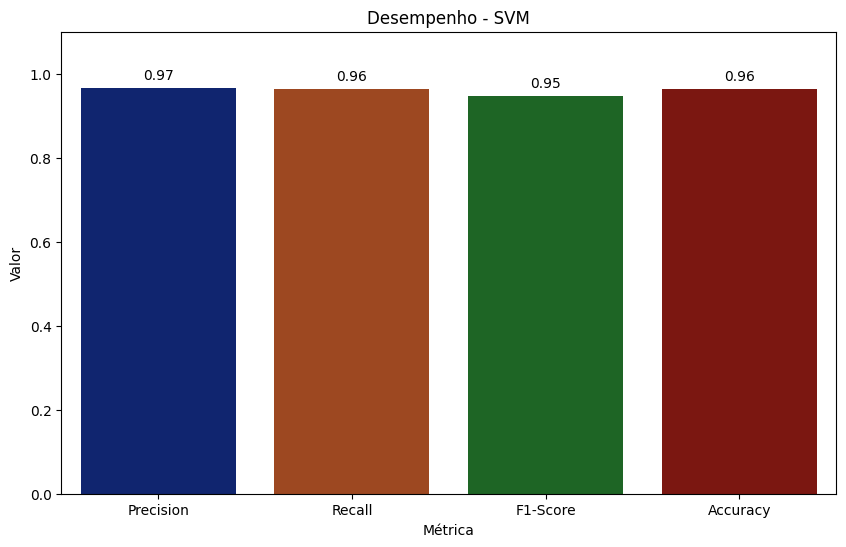

In [ ]:
y_pred = predictsSVM
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
accuracy = accuracy_score(y, y_pred)

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  
                textcoords = 'offset points')

plt.title('Desempenho - SVM')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

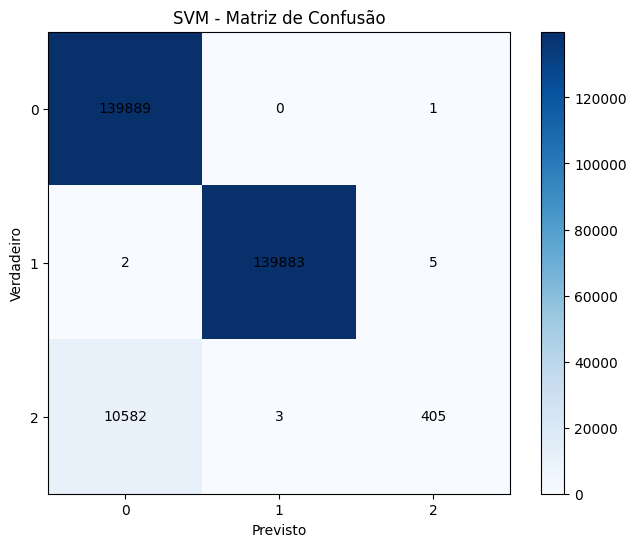

In [ ]:
conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(len(class_names_svm)):
    for j in range(len(class_names_svm)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('SVM - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.xticks(ticks=np.arange(len(class_names_svm)), labels=class_names_svm)
plt.yticks(ticks=np.arange(len(class_names_svm)), labels=class_names_svm)
plt.show()

In [37]:
accuracyRF = accuracy_score(y, predictsRF)
print(f'Precisão do modelo de Floresta Aleatória: {accuracyRF}')

reportRF = classification_report(y, predictsRF, digits=4)
print(f'\nRelatório de Classificação:\n{reportRF}')

Precisão do modelo de Floresta Aleatória: 0.9993259277091859

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9999    1.0000    1.0000    139890
           1     0.9987    1.0000    0.9993    139890
           2     0.9992    0.9830    0.9910     10990

    accuracy                         0.9993    290770
   macro avg     0.9993    0.9943    0.9968    290770
weighted avg     0.9993    0.9993    0.9993    290770



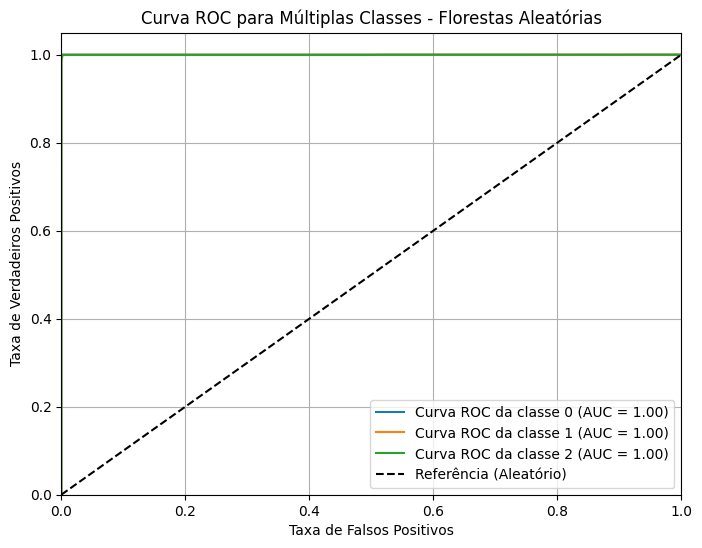

In [ ]:
class_names_rf = rf.classes_
y_test_bin = label_binarize(y, classes=class_names_rf)
n_classes = y_test_bin.shape[1]
y_pred_prob = rf.predict_proba(x)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names_rf[i]} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - Florestas Aleatórias')
plt.legend(loc="lower right")
plt.grid()
plt.show()

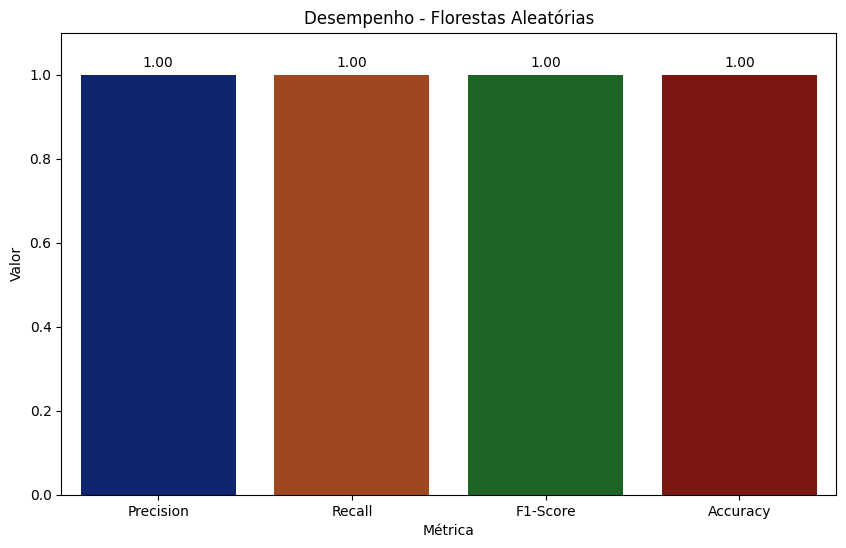

In [ ]:
y_pred = predictsRF
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
accuracy = accuracy_score(y, y_pred)

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.title('Desempenho - Florestas Aleatórias')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

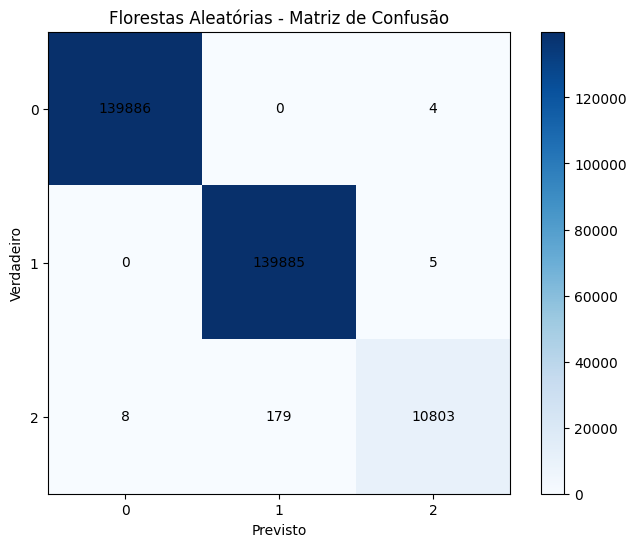

In [ ]:
conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(len(class_names_rf)):
    for j in range(len(class_names_rf)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('Florestas Aleatórias - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

plt.xticks(ticks=np.arange(len(class_names_rf)), labels=class_names_rf)
plt.yticks(ticks=np.arange(len(class_names_rf)), labels=class_names_rf)
plt.show()

In [41]:
accuracyDT = accuracy_score(y, predictsDT)
print(f'Precisão do modelo de Árvore de Decisão: {accuracyDT}')

reportDT = classification_report(y, predictsDT, digits=4)
print(f'\nRelatório de Classificação:\n{reportDT}')

Precisão do modelo de Árvore de Decisão: 0.9670014100491797

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9999    0.9863    0.9931    139890
           1     0.9482    0.9997    0.9733    139890
           2     0.6323    0.3056    0.4121     10990

    accuracy                         0.9670    290770
   macro avg     0.8602    0.7639    0.7928    290770
weighted avg     0.9612    0.9670    0.9616    290770



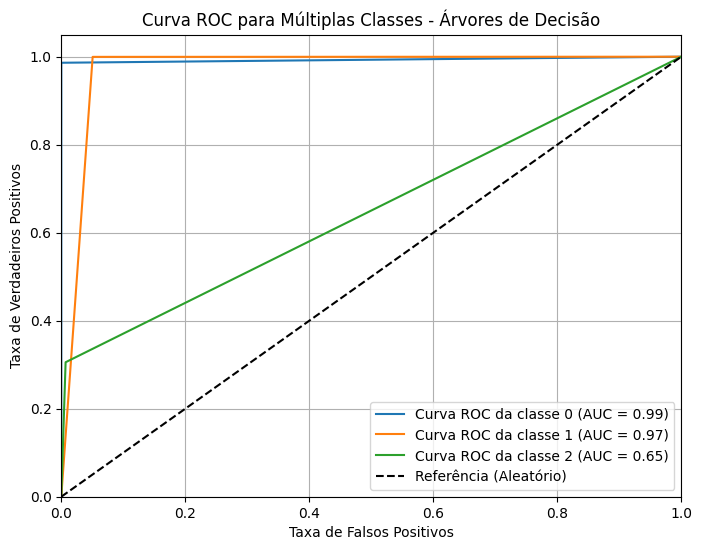

In [ ]:
class_names_dt = dt.classes_
y_test_bin = label_binarize(y, classes=class_names_dt)
n_classes = y_test_bin.shape[1]
y_pred_prob = dt.predict_proba(x)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names_dt[i]} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - Árvores de Decisão')
plt.legend(loc="lower right")
plt.grid()
plt.show()

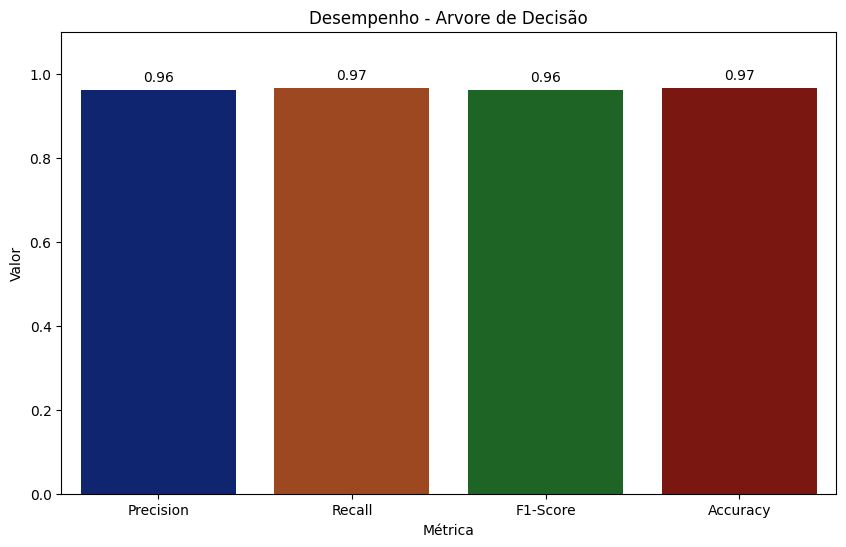

In [ ]:
y_pred = predictsDT
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
accuracy = accuracy_score(y, y_pred)

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  # Distância do texto em relação à barra
                textcoords = 'offset points')

plt.title('Desempenho - Arvore de Decisão')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

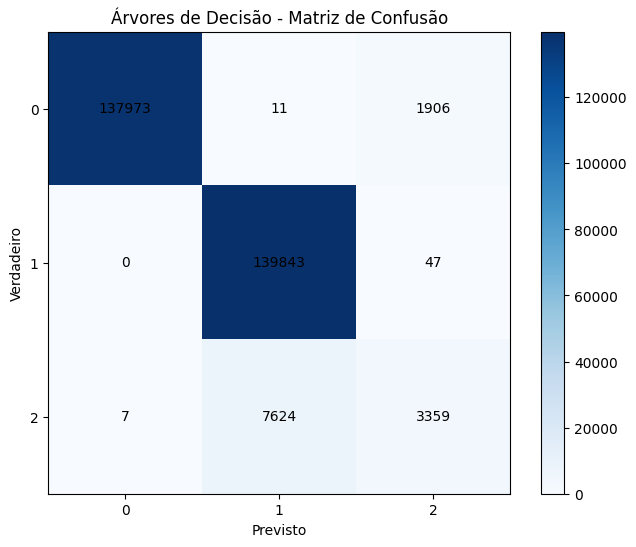

In [ ]:
conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(len(class_names_dt)):
    for j in range(len(class_names_dt)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('Árvores de Decisão - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.xticks(ticks=np.arange(len(class_names_dt)), labels=class_names_dt)
plt.yticks(ticks=np.arange(len(class_names_dt)), labels=class_names_dt)
plt.show()

In [45]:
accuracyNB = accuracy_score(y, predictsNB)
print(f'Precisão do modelo de NB: {accuracyNB}')

reportNB = classification_report(y, predictsNB, digits=4)
print(f'\nRelatório de Classificação:\n{reportNB}')

Precisão do modelo de NB: 0.4810606321147299

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.4811    0.9999    0.6496    139890
           1     0.0000    0.0000    0.0000    139890
           2     0.0000    0.0000    0.0000     10990

    accuracy                         0.4811    290770
   macro avg     0.1604    0.3333    0.2165    290770
weighted avg     0.2315    0.4811    0.3125    290770



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


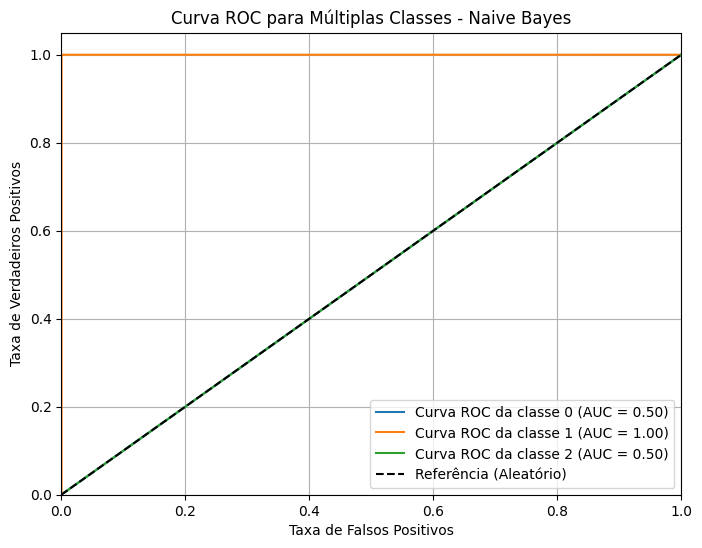

In [ ]:
class_names_nb = nb.classes_
y_test_bin = label_binarize(y, classes=class_names_nb)
n_classes = y_test_bin.shape[1]
y_pred_prob = nb.predict_proba(x)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names_nb[i]} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - Naive Bayes')
plt.legend(loc="lower right")
plt.grid()
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


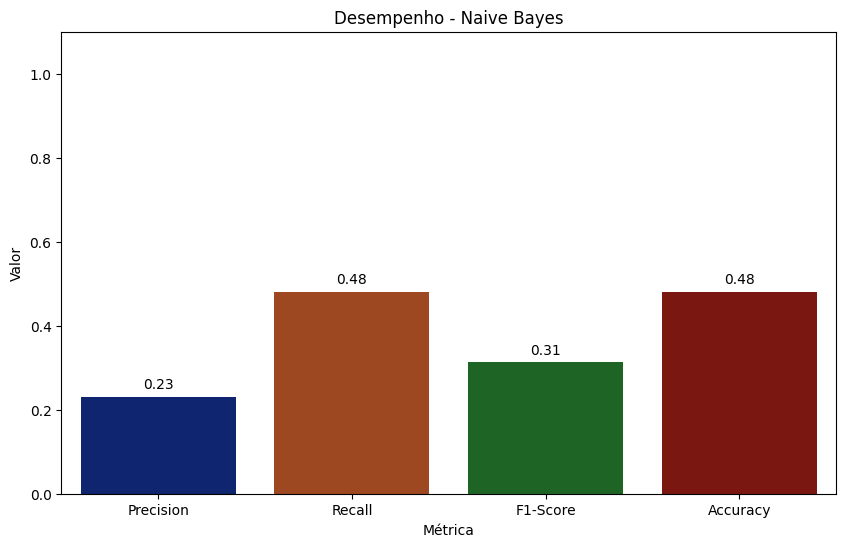

In [ ]:
y_pred = predictsNB
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
accuracy = accuracy_score(y, y_pred)

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  
                textcoords = 'offset points')

plt.title('Desempenho - Naive Bayes')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

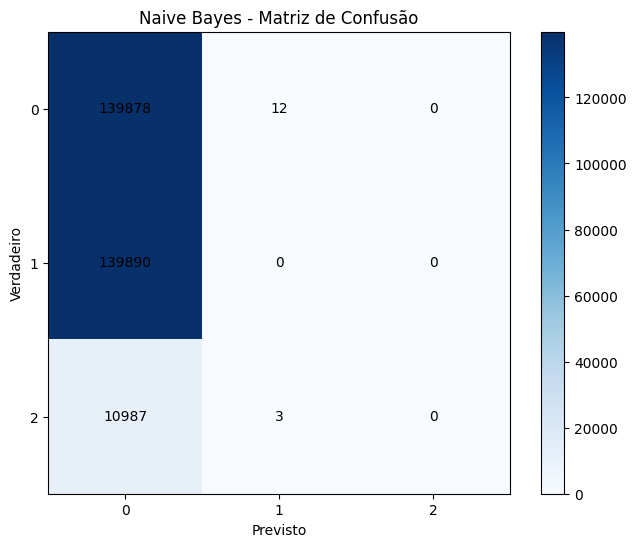

In [ ]:
conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(len(class_names_nb)):
    for j in range(len(class_names_nb)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('Naive Bayes - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.xticks(ticks=np.arange(len(class_names_nb)), labels=class_names_nb)
plt.yticks(ticks=np.arange(len(class_names_nb)), labels=class_names_nb)
plt.show()

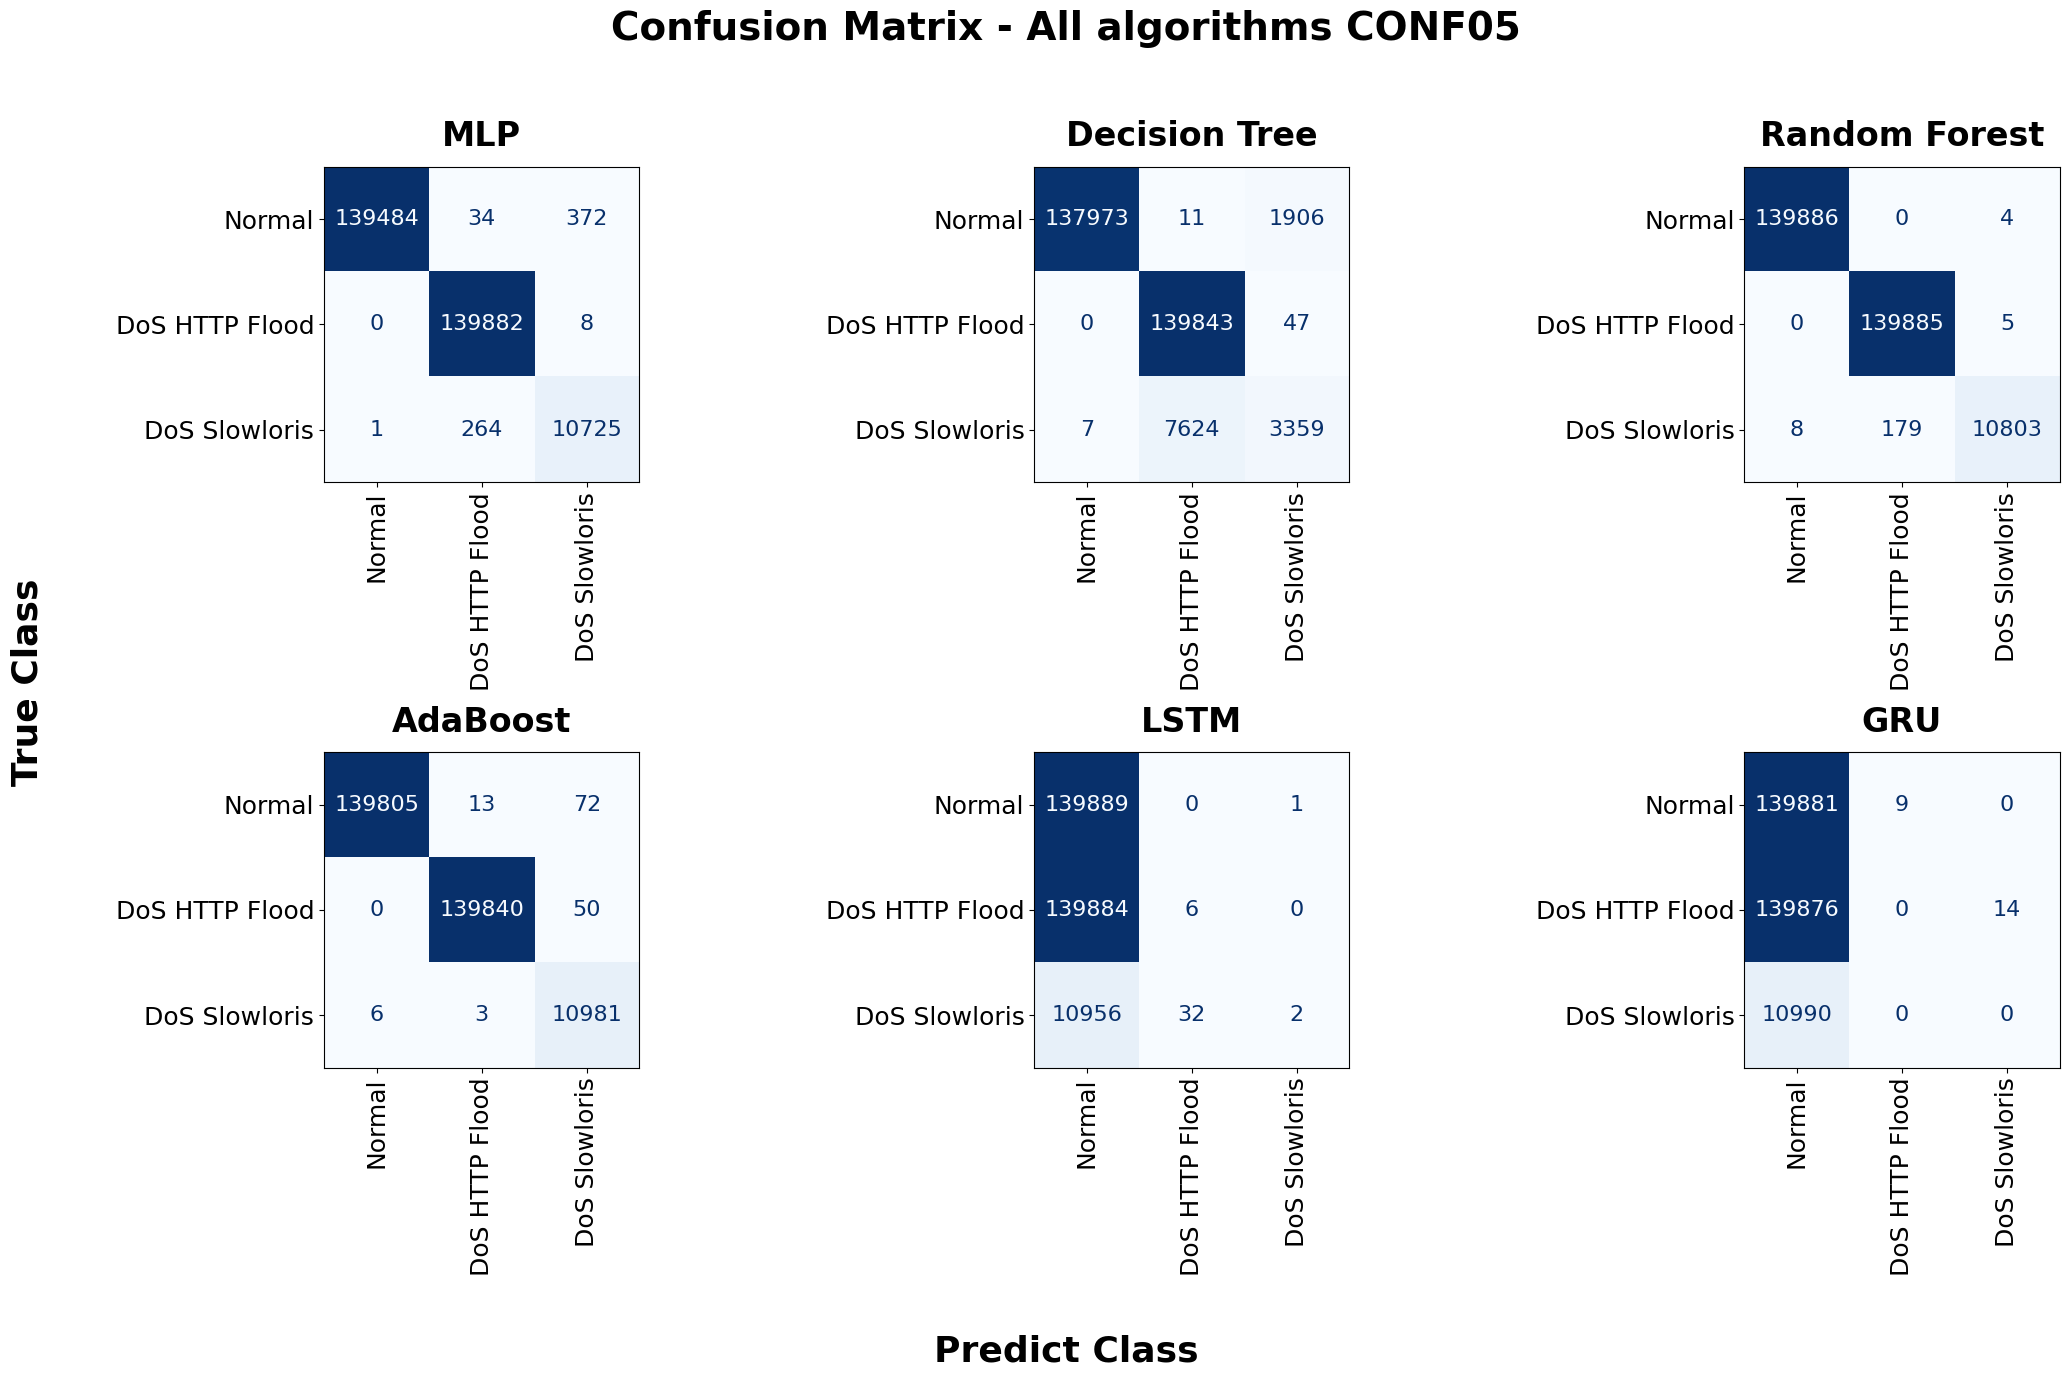

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

modelos = {
    "MLP": mlp,
    "Decision Tree": dt,
    "Random Forest": rf,
    "AdaBoost": adb,
    "LSTM": lstm, 
    "GRU": gru   
}

nomes_classes = ['Normal', 'DoS HTTP Flood', 'DoS Slowloris']
unique_labels = sorted(y.unique())

predicoes = {}
for nome, modelo in modelos.items():
    if nome in ["LSTM", "GRU"]:
        y_pred_proba = modelo.predict(x, verbose=0)
        predicoes[nome] = np.argmax(y_pred_proba, axis=1)
    else:
        predicoes[nome] = modelo.predict(x)

fig, axes = plt.subplots(2, 3, figsize=(22, 14))

for ax, (nome_modelo, modelo) in zip(axes.ravel(), modelos.items()):
    cm = confusion_matrix(y, predicoes[nome_modelo], labels=unique_labels)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nomes_classes)
    disp.plot(ax=ax, cmap='Blues', colorbar=False, xticks_rotation='vertical')

    for text in disp.text_.ravel():
        text.set_fontsize(16)

    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.set_title(f"{nome_modelo}", fontsize=24, fontweight='bold', pad=15)

    ax.set_xlabel('')
    ax.set_ylabel('')

fig.supxlabel('Predict Class', fontsize=26, fontweight='bold')
fig.supylabel('True Class', fontsize=26, fontweight='bold')

plt.suptitle("Confusion Matrix - All algorithms CONF05", fontsize=28, fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('comparacao_matrizes_confusao.png') 
plt.show()

KeyboardInterrupt: 

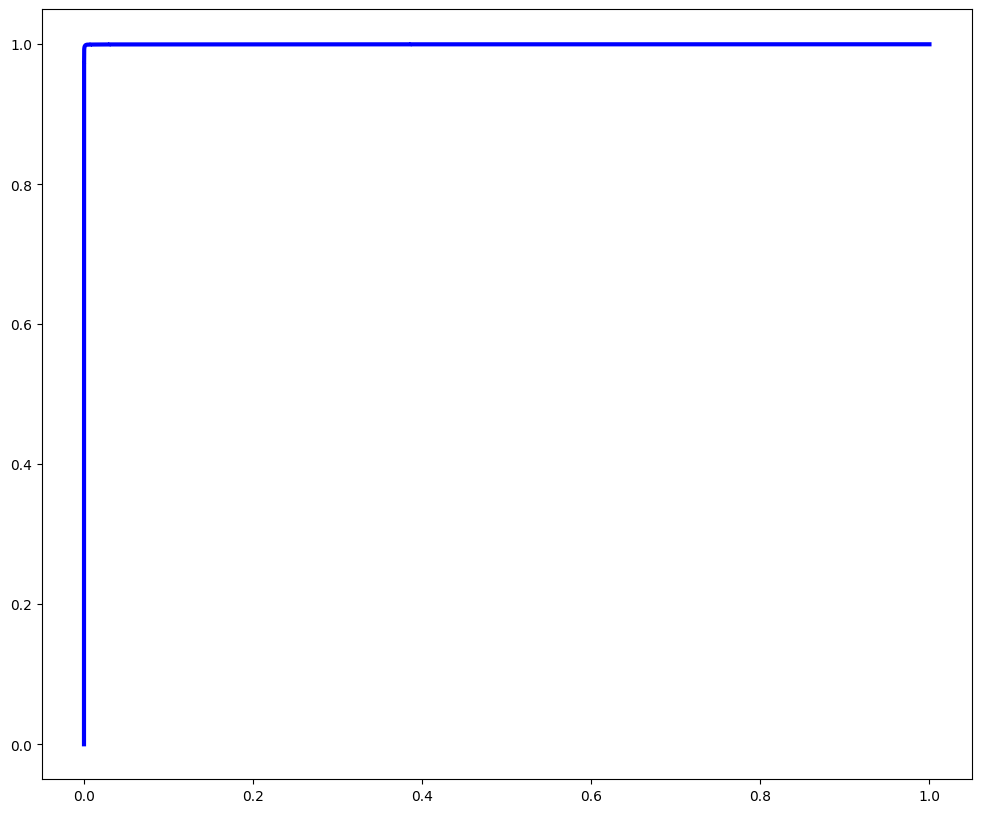

In [ ]:
x_test_sklearn = x
x_test_lstm = x
y_test_reais = y_test 
class_names = np.unique(y_test_reais)
y_test_bin = label_binarize(y_test_reais, classes=class_names)
n_classes = len(class_names)

modelos = {
    "MLP": modelMLP,
    "GRU": gru,
    "Decision Tree": modelDT,
    "Random Forest": modelRF,
    "AdaBoost": adb,
    "LSTM": lstm,
}

plt.figure(figsize=(12, 10))
cores = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

for i, (nome_modelo, modelo) in enumerate(modelos.items()):

    y_pred_prob = None

    if nome_modelo in ["LSTM", "GRU"]:
        y_pred_prob = modelo.predict(x_test_lstm, verbose=0)
    elif hasattr(modelo, 'predict_proba'):
        y_pred_prob = modelo.predict_proba(x_test_sklearn)
    else:
        print(f"Aviso: O modelo {nome_modelo} foi ignorado (sem método de probabilidades).")
        continue

    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)

    plt.plot(
        fpr,
        tpr,
        color=cores[i % len(cores)],
        lw=3,
        label=f'ROC {nome_modelo} (AUC = {roc_auc:.4f})'
    )

plt.plot(
    [0, 1],
    [0, 1],
    color='gray',
    lw=2,
    linestyle='--',
    label='Reference (Random)'
)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.title('Comparison of the ROC (Micro-Average) Curve between Models', fontsize=18, fontweight='bold')
plt.legend(loc="lower right", fontsize=11, title="Models ML and DL")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from scipy.stats import sem, t

if predictLSTM.ndim > 1 and predictLSTM.shape[1] > 1:
    predictLSTM_labels = np.argmax(predictLSTM, axis=1)
else:
    predictLSTM_labels = predictLSTM

if predictGRU.ndim > 1 and predictGRU.shape[1] > 1:
    predictGRU_labels = np.argmax(predictGRU, axis=1)
else:
    predictGRU_labels = predictGRU

resultados = {
    "Algoritmo": ["LSTM", "MLP", "Árvores de Decisão", "Florestas Aleatórias", "AdaBoost", "GRU"],
    "Precision": [precision_score(y, predictLSTM_labels, average='weighted'), 
                  precision_score(y, predictsMLP, average='weighted'),
                  precision_score(y, predictsDT, average='weighted'),
                  precision_score(y, predictsRF, average='weighted'),
                  precision_score(y, predictsADB, average='weighted'),
                  precision_score(y, predictGRU_labels, average='weighted')], 
    "Recall": [recall_score(y, predictLSTM_labels, average='weighted'),
               recall_score(y, predictsMLP, average='weighted'),
               recall_score(y, predictsDT, average='weighted'),
               recall_score(y, predictsRF, average='weighted'),
               recall_score(y, predictsADB, average='weighted'),
               recall_score(y, predictGRU_labels, average='weighted')],
    "F1-Score": [f1_score(y, predictLSTM_labels, average='weighted'),
                 f1_score(y, predictsMLP, average='weighted'),
                 f1_score(y, predictsDT, average='weighted'),
                 f1_score(y, predictsRF, average='weighted'),
                 f1_score(y, predictsADB, average='weighted'),
                 f1_score(y, predictGRU_labels, average='weighted')],
    "Accuracy": [accuracy_score(y, predictLSTM_labels),
                 accuracy_score(y, predictsMLP),
                 accuracy_score(y, predictsDT),
                 accuracy_score(y, predictsRF),
                 accuracy_score(y, predictsADB),
                 accuracy_score(y, predictGRU_labels)]
}

df_resultados = pd.DataFrame(resultados)

df_resultados = pd.DataFrame(resultados)

def calcular_intervalo_confianca(dados):
    n = len(dados)
    if n < 2:
        return 0  
    erro_padrao = sem(dados)
    t_critico = t.ppf(0.975, n - 1)  
    intervalo = t_critico * erro_padrao
    return intervalo

metricas = ["Precision", "Recall", "F1-Score", "Accuracy"]

plt.figure(figsize=(15, 10))

for i, metrica in enumerate(metricas, 1):
    plt.subplot(2, 2, i)

    ic_95 = np.array([calcular_intervalo_confianca(df_resultados[metrica]) for _ in range(len(df_resultados))])
    ax = sns.barplot(x="Algoritmo", y=metrica, data=df_resultados, palette="dark", errorbar=None)

    for j, p in enumerate(ax.patches):
        valor = p.get_height()

        ax.annotate(f'{valor:.3f}',
                    (p.get_x() + p.get_width() / 2., valor),
                    ha='center', va='center',
                    xytext=(0, 10), textcoords='offset points', fontsize=10, fontweight='bold')

    plt.title(f"Comparação de {metrica} entre os Algoritmos")
    plt.ylim(0, 1.1)
    plt.xlabel("Algoritmos abordados - IA treinada com CIC2017 e testada com CIC2018")
    plt.ylabel(metrica)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
import time
import numpy as np

def calcular_tempo_inferencia(modelo, dados_para_teste):

  modelo.predict(dados_para_teste[:1])

  tempos = []
  for _ in range(100): 
      inicio = time.perf_counter()
      modelo.predict(dados_para_teste)
      fim = time.perf_counter()
      tempos.append(fim - inicio)

  tempo_medio_lote_ms = np.mean(tempos) * 1000
  tempo_por_previsao_ms = tempo_medio_lote_ms / len(dados_para_teste)

  return tempo_por_previsao_ms

In [ ]:
from tqdm.notebook import tqdm # Ou from tqdm import tqdm

dicionario_modelos = {
    "MLP": modelMLP,
    "GRU": gru,
    "Árvores de Decisão": modelDT,
    "Florestas Aleatórias": modelRF,
    "AdaBoost": adb,
    "LSTM": lstm,
}


amostra_para_teste = x[:1000]

tempos_resultados = {}

for nome_modelo, objeto_modelo in tqdm(dicionario_modelos.items()):
    print(f"Calculando tempo para o modelo: {nome_modelo}...")

    tempo_ms = calcular_tempo_inferencia(objeto_modelo, amostra_para_teste)

    tempos_resultados[nome_modelo] = tempo_ms

    print(f"-> Tempo por previsão: {tempo_ms:.6f} ms\n")

print("\n--- Dicionário Final com os Tempos de Inferência ---")
print(tempos_resultados)

In [ ]:
df_tempos = pd.DataFrame(list(tempos_resultados.items()), columns=['Model', 'Model Inference (ms)'])
df_tempos = df_tempos.sort_values(by='Model Inference (ms)', ascending=True)

In [ ]:
df_tempos.to_csv('/poseiddon/GROUP B/CONFIGURATION 5/tempos_deteccao_cic2018.csv', index=False)

In [ ]:
plt.figure(figsize=(12, 7))

ax = sns.barplot(
    x='Model Inference (ms)',
    y='Model',
    data=df_tempos,
    palette='viridis',
    orient='h' 
)

for p in ax.patches:
    ax.annotate(f'{p.get_width():.6f} ms',
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha = 'left', va = 'center',
                xytext = (5, 0),
                textcoords = 'offset points',
                fontsize=10, fontweight='bold')

plt.title('Tempo de Detecção Médio por Modelo', fontsize=16, fontweight='bold')
plt.xlabel('Tempo Médio por Previsão (ms)', fontsize=12)
plt.ylabel('Modelo', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.xlim(0, df_tempos['Model Inference (ms)'].max() * 1.15)

plt.tight_layout()
plt.show()

In [ ]:
df_resultados.rename(columns={'Algoritmo': 'Algorithm'}, inplace=True)
df_resultados.head()

In [ ]:
df_times = df_tempos.copy()
df_times.head()

In [ ]:
nova_sequencia = ['LSTM', 'MLP', 'Árvores de Decisão', 'Florestas Aleatórias', 'AdaBoost', 'GRU']

model_category = pd.CategoricalDtype(nova_sequencia, ordered=True)

df_times['Model'] = df_times['Model'].astype(model_category)

In [ ]:
df_reordenado = df_times.sort_values('Model')

df_reordenado.head(10)

In [ ]:
df_reordenado = df_reordenado.reset_index(drop=True)
df_reordenado.head(10)

In [ ]:
data = pd.concat([df_resultados, df_reordenado['Model Inference (ms)']], axis=1)
data.head(10)

In [ ]:
data.insert(0, 'Configuration', 'Configuration 5')
data.head()

In [ ]:
data.to_csv('/poseiddon/GROUP B/CONFIGURATION 5/all_results_cic2018_conf05.csv')